Problem Statement:
Consider a company wants to recruit certain people for certain positions. They have found a potential employee who is currently working as a vice president for last 2 years. He is expecting a salary of 3,30,000 for his 2 years experience as vice president.

Now the question is, does his demand fit into our company’s salary structure? If his demand fits, how much can we really offer him?

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset= pd.read_csv("C:/Users/itspark/Documents/Analytics/dataset/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,President,7,200000
7,Senior President,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Looking at the dataset, it does not seem linear. As higher positions are concerned, salaries are changing non linearly. Let us first check whether linear regression is providing any good predictions.

Usually in our company, an employee can rise from Vice President to President level in 6 years, so we will predict salary for 8.3 level, because the employee has worked one third of tenure to become President.

Why to use Polynomial Regression?
Let us understand why we are using polynomial regression instead of linear regression. Looking at the dataset, it does not seem linear. As higher positions are concerned, salaries are changing non linearly. Let us first check whether linear regression is providing any good predictions.

In [2]:
X = dataset.iloc[:, 1:2].values # This line creates a matrix
y = dataset.iloc[:, 2].values

In [3]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
salary = lin_reg.predict([[8.3]])
salary

array([475960.60606061])

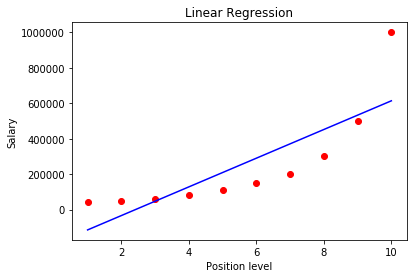

In [5]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Note that red dots are actual salaries plotted against position levels. for position 8.3, our model has predicted a salary of approximately 4,75,960 which is way more than potential employee wanted.

Blue line is regression line and its predictions are far from the reality in most of the cases. We can have a different model to consider and hence we can look into polynomial regression.

In [6]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

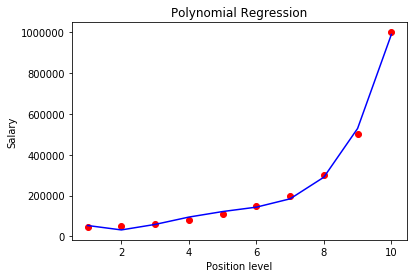

In [7]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [8]:
# Predicting a new result with Polynomial Regression
salary = lin_reg_2.predict(poly_reg.fit_transform([[8.3]]))
salary

array([344041.99460948])

Salary predicted by polynomial regression is approximately 344041 which is close to what he was asking for and it fits our company salary model.

Our company can hire the new vice president and he will happily come to us :